<a href="https://colab.research.google.com/github/pi-mishra/PNB_stock_prediction/blob/main/PNB_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:

The Punjab National Bank (PNB) aims to develop a regression and time series forecasting model to predict the adjusted close price of its stock. The data for this project is extracted from Yahoo Finance and consists of the following columns: Date, Open, High, Low, Close, Adj Close, and Volume. The objective is to build a robust predictive model that accurately forecasts the future adjusted close prices of PNB stock based on historical data.

Data Description:

The dataset provided by Yahoo Finance contains historical information related to PNB stock prices. The data is structured with the following columns:

1. Date: Represents the date on which the stock data was recorded.
2. Open: Indicates the opening price of the PNB stock on a particular day.
3. High: Represents the highest price reached by the PNB stock during the trading day.
4. Low: Indicates the lowest price reached by the PNB stock during the trading day.
5. Close: Represents the closing price of the PNB stock on a particular day.
6. Adj Close: Represents the adjusted closing price of the PNB stock on a particular day, which accounts for dividends, stock splits, and other corporate actions.
7. Volume: Indicates the total number of shares traded on a particular day.

The dataset covers a specific time range, including historical data from various trading days. The goal of this project is to utilize this historical information to develop a regression and time series forecasting model that can accurately predict the adjusted close price of PNB stock for future dates based on the given features (Open, High, Low, Close, and Volume) from the historical data.

In [1]:
#importing important packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/yes_bank/PNB.NS.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,9.60,9.74,9.55,9.57,6.875042,825970.0
1,2002-07-02,9.60,9.67,9.45,9.50,6.824753,653405.0
2,2002-07-03,9.46,9.57,9.46,9.51,6.831936,305880.0
3,2002-07-04,9.56,9.90,9.52,9.72,6.982801,2413155.0
4,2002-07-05,9.90,9.95,9.60,9.85,7.076193,3460955.0


In [4]:
df.shape

(5215, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5215 entries, 0 to 5214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5215 non-null   object 
 1   Open       5191 non-null   float64
 2   High       5191 non-null   float64
 3   Low        5191 non-null   float64
 4   Close      5191 non-null   float64
 5   Adj Close  5191 non-null   float64
 6   Volume     5191 non-null   float64
dtypes: float64(6), object(1)
memory usage: 285.3+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5.191000e+03
mean,105.283965,107.184781,103.317891,105.176082,93.817473,1.865893e+07
std,60.235406,61.093061,59.350666,60.194650,54.858895,3.687519e+07
min,7.450000,8.190000,7.450000,8.090000,5.811817,0.000000e+00
25%,54.125000,55.375000,52.799999,53.845001,48.399999,2.726366e+06
50%,94.120003,95.930000,92.300003,94.099998,80.418854,6.138000e+06
75%,149.075005,151.529999,146.250000,148.800003,140.278130,1.867619e+07
max,275.309998,279.980011,271.519989,277.079987,238.678467,5.118155e+08


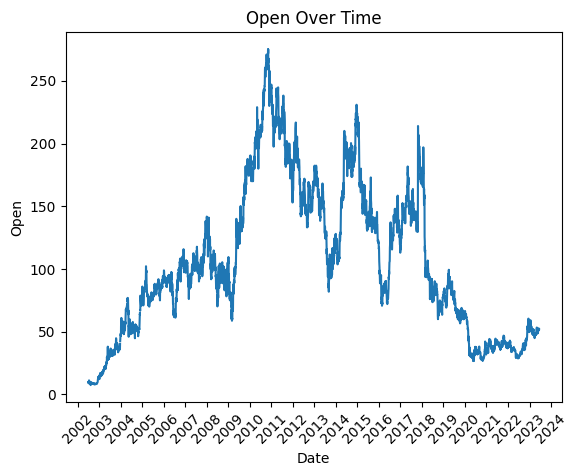

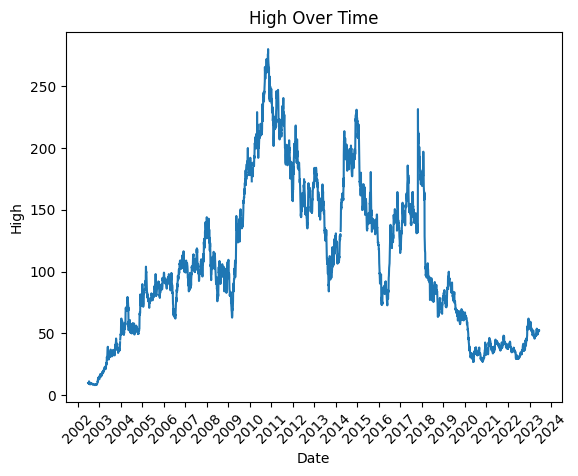

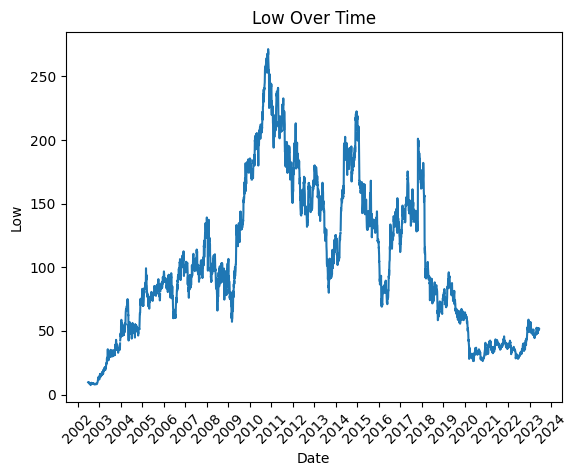

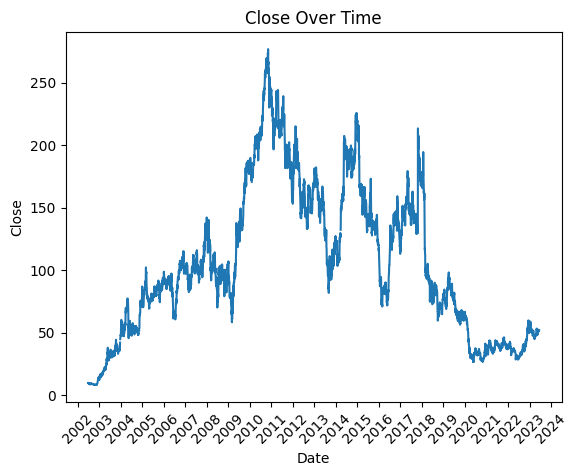

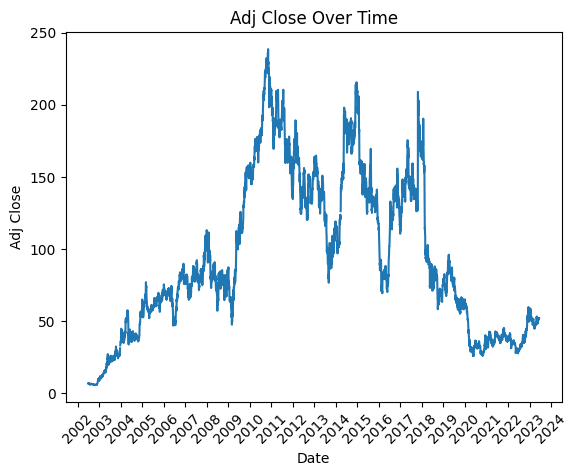

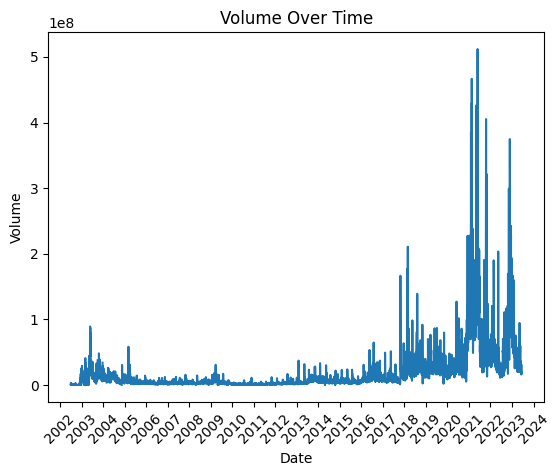

In [8]:
col = ['Open','High','Low','Close','Adj Close','Volume']

for i in col:
    dates = df['Date']
    col_name = df[i]

    plt.plot(dates, col_name)

    plt.title(f'{i} Over Time')
    plt.xlabel('Date')
    plt.ylabel(i)

    # Set x-axis ticks to display years only
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.xticks(rotation=45)
    plt.show()

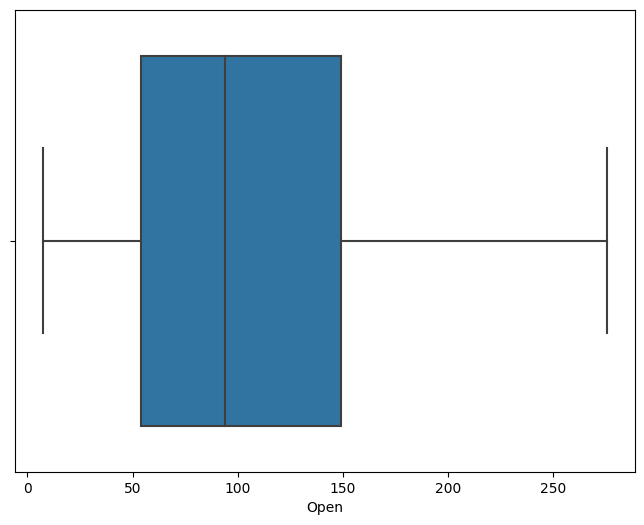

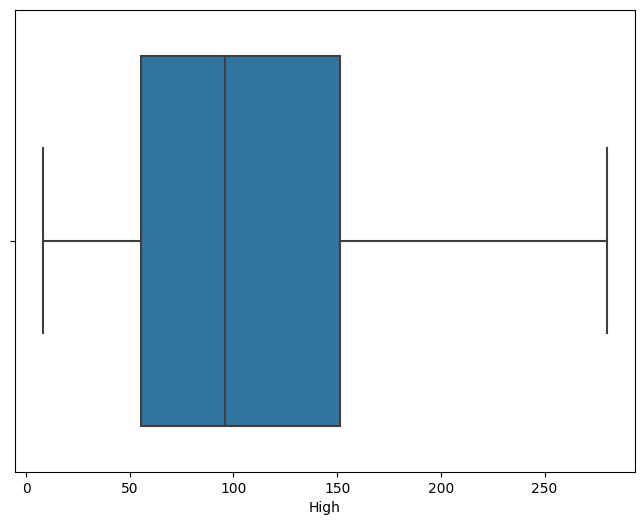

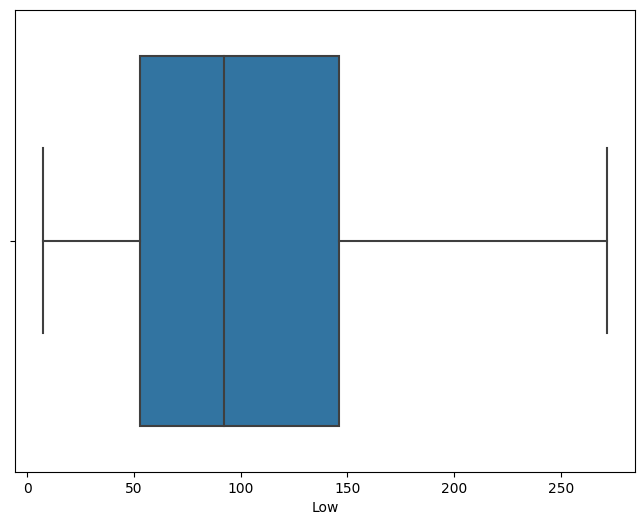

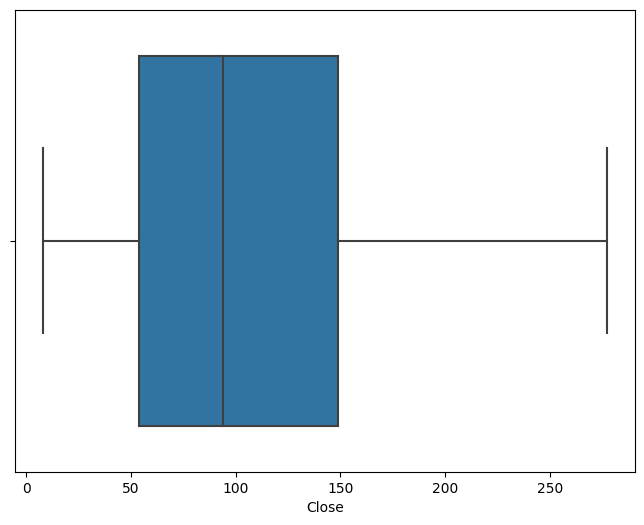

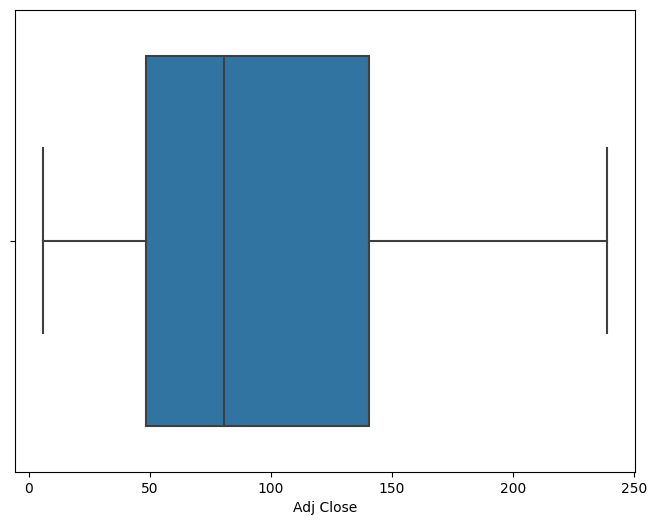

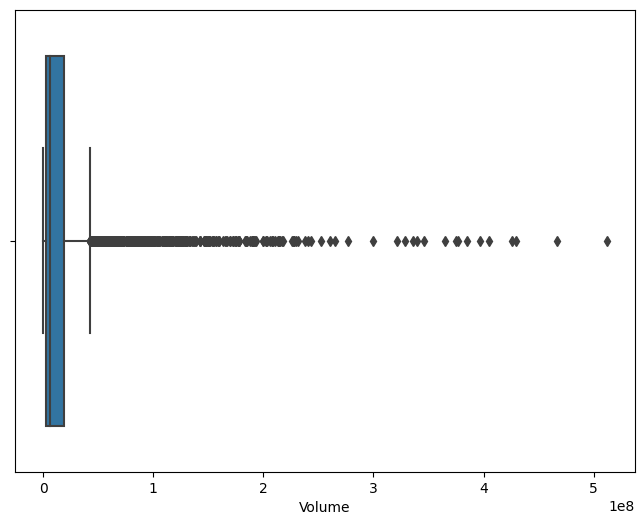

In [9]:

for i in col:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[i])
  plt.show()

<Axes: xlabel='Adj Close', ylabel='Density'>

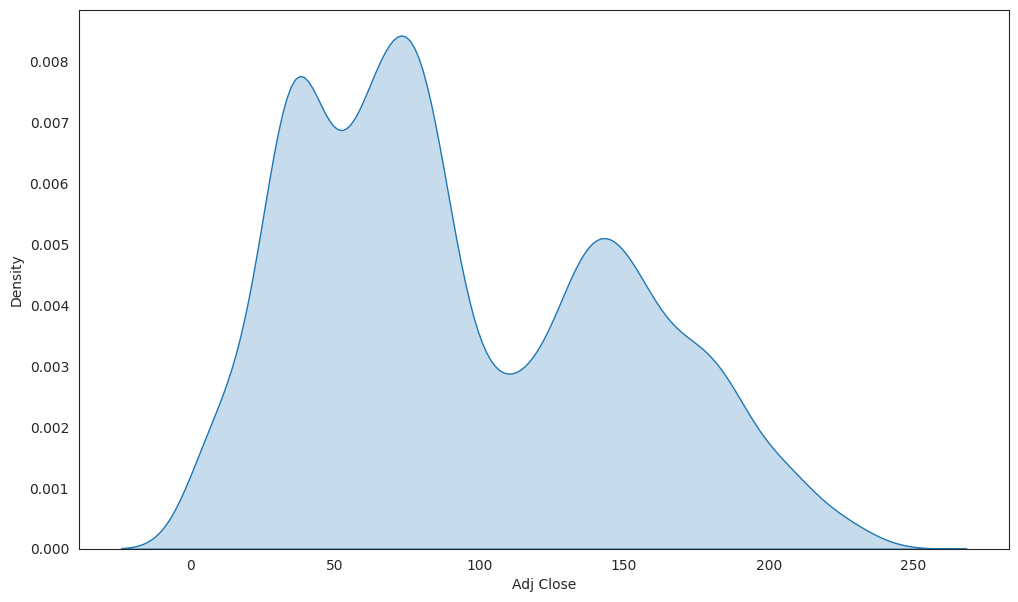

In [12]:
# KDE plot of dependent variable
plt.figure(figsize=(12,7))
sns.kdeplot(data=df['Adj Close'], shade=True)


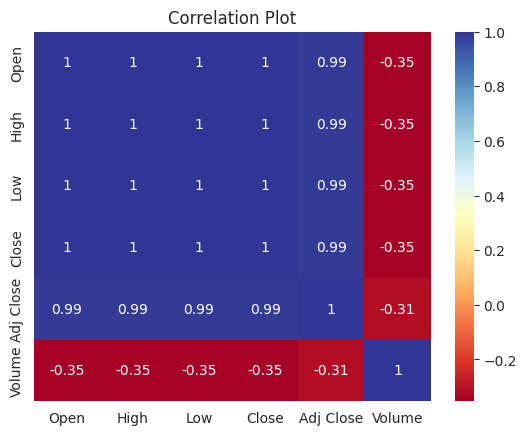

In [10]:
correlation_matrix = df.corr()
sns.set_style("white")
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title('Correlation Plot')
plt.show()

In [11]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999356,0.999411,0.998832,0.988382,-0.352610
High,0.999356,1.000000,0.999166,0.999521,0.988735,-0.349856
Low,0.999411,0.999166,1.000000,0.999471,0.988999,-0.353474
Close,0.998832,0.999521,0.999471,1.000000,0.989165,-0.351325
Adj Close,0.988382,0.988735,0.988999,0.989165,1.000000,-0.311933
Volume,-0.352610,-0.349856,-0.353474,-0.351325,-0.311933,1.000000
